# SuSiE
- variable seletion
- application: genetic fine-mapping

## Introduction
- Previous Bayesian variable selection in regression (BVSR)
    - computationally challenging (MCMC)
    - output of BVSR is a complex posterior distribution, not easily interpretable
    - new method is built on BVSR, address these shortcomings of BVSR


- Introduce a new formulation of BVSR - “Sum of Single Effects” (SuSiE) model
    - Iterative Bayesian Stepwise Selection (IBSS) - simple, intuitive, fast model fitting
    - optimizes a variational approximation to the posterior distribution
    - provides more accurate inferences in settings with highly correlated variables


- Innovations
    - produces "Credible Sets" (CS) of variables to quantify uncertainty: as small as possible and capture relevant variables
    - little computational effor to provide posterior summary directly

## Background
### Shortcomings of existing methods
- LASSO: select a single "best" combination of variables, do not assess other plausible combinations.
- selective inference approaches: do not assess uncertainty in variable selection, but assess uncertainty in the **coefficients** of the selected variables.
- stability selection: address uncertainty in variable selection by controlling false discoverty rate (FDR) among selected variables, but it can not confidently declare effect variables with highly correlated variables (no discoveries).
- BVSR: introduce a prior distribution on b and compute a posterior distribution, but marginal posterior inclusion probability (PIP) of each variable is less informative then credible set.

### Credible Sets
- Definition: a level-ρ Credible Set is a subset of variables that has probability $\ge p$ of containing at least one effect variable; or, the probability that all variables in the Credible Set have zero regression coefficients is $\le 1-p$.
- Aim 1: report as many CSs as the data support, each with as few variables as possible.
- Aim 2: prioritize the variables within each CS by assigning each a probability that reflects the strength of the evidence for that variable being an effect variable (PIP).

### Single Effect Regression (SER) model
- effect vector $\boldsymbol{b}$ has exactly one non-zero element (single effect).
- $\boldsymbol{b} = b\boldsymbol{\gamma}$: $\boldsymbol{\gamma}$ is a p-vector of indicator variables (binary vector), has exactly one non-zero entry.
- $\boldsymbol{\gamma} \sim \text{Mult}(1, \pi)$: multinomial distribution obtained when 1 sample are drawn with class probabilities given by π.
- π: probability vector, determines the prior probability distribution on which of the p variables is the effect variable. 

> /home/min/Pictures/SingleEffectModel.png (8.3 KiB):

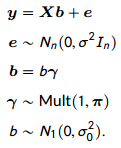

In [4]:
%preview /home/min/Pictures/SingleEffectModel.png

## Sum of single effects regression model (Variable seletion in multiple regression)
### “Sum of Single Effects” (SuSiE) regression model

> /home/min/Pictures/SumofSingleEffectsRegressionModel.png (11.0 KiB):

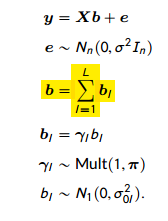

In [1]:
%preview /home/min/Pictures/SumofSingleEffectsRegressionModel.png

### Iterative Bayesian stepwise selection (IBSS) algorithm

> /home/min/Pictures/IterativeBayesianStepwiseSelection.png (73.2 KiB):

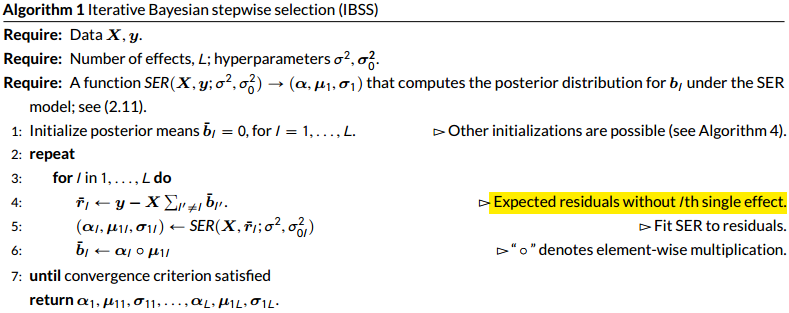

In [2]:
%preview /home/min/Pictures/IterativeBayesianStepwiseSelection.png

### Algorithm steps
- Provide X and y and define number of effects L;
- Initialize $\boldsymbol{b}$ ;
- Repeat following until convergence criterion satisfied:
    - In $[1, ..., L]$, compute the residuals withouth $l$th single effect;
    - Fit single effect regression model to residuals, compute a distribution (capture uncertainty) on which variable to select;
    - Calculate posterior $\boldsymbol{b}$ .
- Output: L distributions of variables.

### Choice of L
Robust ot ooverstating L: when L is larger than necessary, extra effects are too diffuse to impact key inferences. In other words, setting L to be larger than necessary slightly inflates PIPs. Therefore, the results would not be too sensitive to the choice of L.

## Application - genetic fine-mapping
- Generate data of expression quantitative trait loci (eQTLs) for fine-mapping; X is a matrix of genotype data, exhibit very high levels of correlations among variables (SNPs);
- X contains 1000 variables (SNPs); 2 effect variables (labeled in red in marginal association figure).
- The variable most strongly associated with y is not one of the actual effect variables.
- IBSS converges to a solution in which the two 95% CSs (SuSiE fit from IBSS figure), each contains a true effect variable; neither of them contains the variable that has the strongest marginal association.
- CS with open dark blue circle contains only 3 SNPs.

> /home/min/Pictures/fine-mapping.png (36.7 KiB):

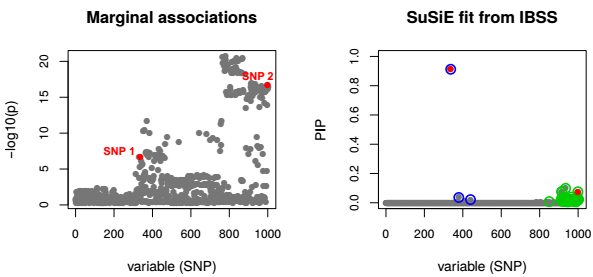

In [5]:
%preview /home/min/Pictures/fine-mapping.png

### Comparison with existing fine-mapping methods
Compare results with FINEMAP, CAVIAR and DAP-G, all implemented in C++.
- When L=1, PIPs from all four methods agree closely.
- When L>1, higher ratio of red and grey points below the diagonal than above suggests that SuSiE PIPs may better distinguish effect variables from non-effect variables.
- Power versus False Discovery Rate (FDR): at a given FDR, the SuSiE PIPs always yield higher power.
- SuSiE, although implemented in R, its computations are much faster than the other methods (Table 1).

> /home/min/Pictures/DirectComparison.png (250.4 KiB):

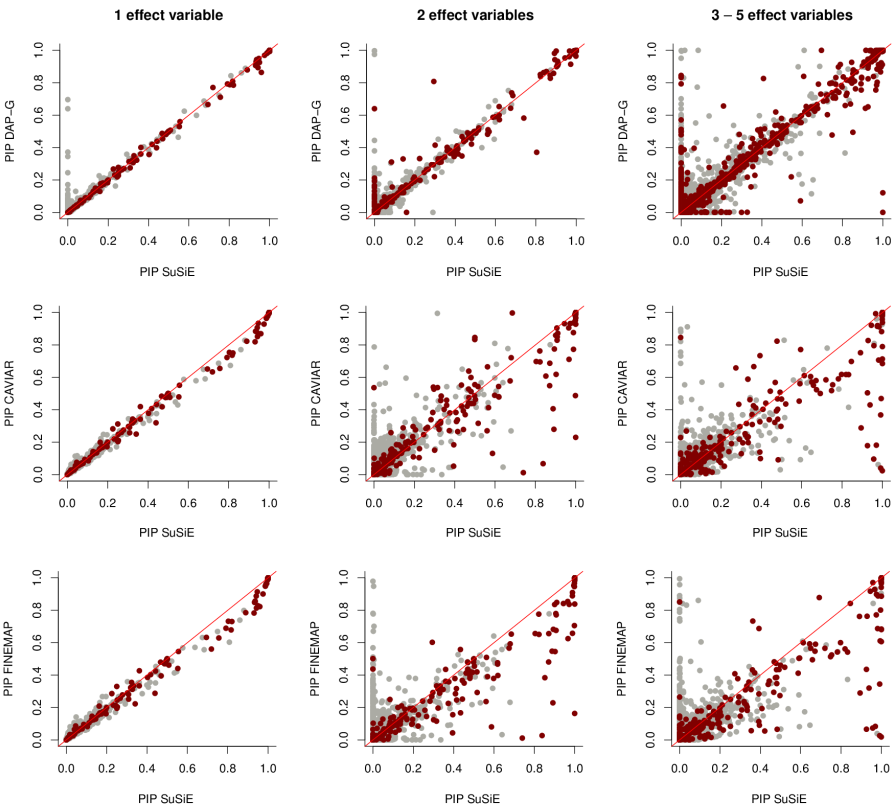

In [6]:
%preview /home/min/Pictures/DirectComparison.png

> /home/min/Pictures/FDRPower.png (33.2 KiB):

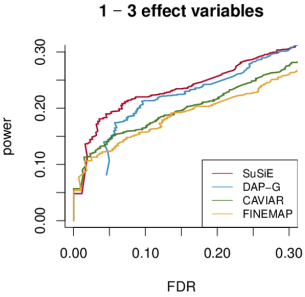

In [10]:
%preview /home/min/Pictures/FDRPower.png

> /home/min/Pictures/RuntimeComparison.png (21.7 KiB):

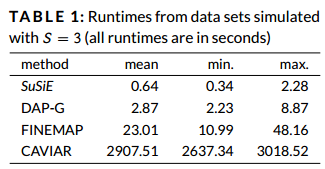

In [11]:
%preview /home/min/Pictures/RuntimeComparison.png

## Discussion
- Benefits of SuSiE: computational efficiency, summarize uncertainty in which variables should be selected; provide CSs.
- Key to SuSiE method: additive structure; can apply to adding up any simple models, not only SER models, as long as Bayesian calculations are tractable.
- Future work: extend to generalized linear models; modify the methods to deals with only summary data are available.